In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

In [4]:
x = df[["age"]]
y = df.bought_insurance

Text(0, 0.5, 'bought_insurance')

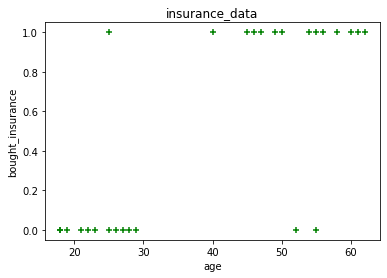

In [5]:
plt.scatter(x, y, marker="+", c="green")
plt.title("insurance_data")
plt.xlabel("age")
plt.ylabel("bought_insurance")

In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [7]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter=10000)

In [8]:
lgr.fit(xtrain, ytrain)

LogisticRegression(max_iter=10000)

In [9]:
lgr.score(xtest, ytest)

0.8571428571428571

Text(0, 0.5, 'bought_insurance')

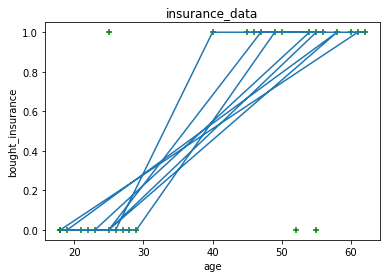

In [10]:
plt.scatter(x, y, marker="+", c="green")
plt.plot(x, lgr.predict(x))
plt.title("insurance_data")
plt.xlabel("age")
plt.ylabel("bought_insurance")

In [11]:
lgr.predict([[40]])

array([1], dtype=int64)

In [12]:
lgr.predict_proba([[40]])

array([[0.40526684, 0.59473316]])

In [13]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [15]:
df.groupby("salary").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


In [16]:
df.groupby("Department").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


<AxesSubplot:xlabel='Department'>

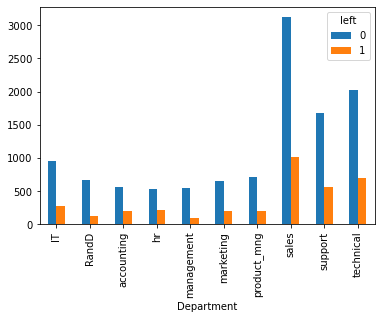

In [17]:
pd.crosstab(df.Department, df.left).plot(kind="bar")

<AxesSubplot:xlabel='salary'>

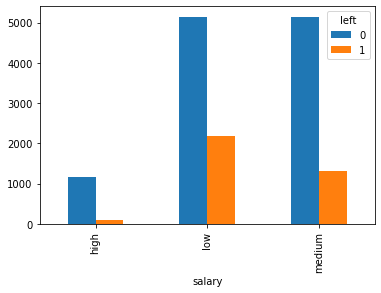

In [18]:
pd.crosstab(df.salary, df.left).plot(kind="bar")

In [19]:
x = df.drop("left", axis="columns")
y = df.left

In [20]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
x.Department = le.fit_transform(x.Department)

In [23]:
x.salary = le.fit_transform(x.salary)

In [24]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
x_scaled = scaler.fit_transform(x)

In [27]:
xtrain ,xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.25, random_state=1)

In [28]:
lgr.fit(xtrain, ytrain)

LogisticRegression(max_iter=10000)

In [29]:
lgr.score(xtest, ytest)

0.7666666666666667

In [30]:
df[0:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [31]:
lgr.predict_proba(scaler.fit_transform(x[0:1]))

array([[0.45326027, 0.54673973]])

In [32]:
# xtrain was scaled so .predict() must be scaled
lgr.predict_proba(scaler.fit_transform([[0.88, 0.24, 5, 134, 9, 0, 0, 2, 1]]))

array([[0.45326027, 0.54673973]])

# multiclass y

In [33]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [35]:
df.species = le.fit_transform(df.species)

In [36]:
x = df.drop("species", axis="columns")
y = df.species

In [37]:
x_scaled = scaler.fit_transform(x)

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [39]:
lgr.fit(xtrain, ytrain)

LogisticRegression(max_iter=10000)

In [40]:
lgr.score(xtest, ytest)

0.9736842105263158

In [41]:
lgr.predict_proba(scaler.fit_transform(xtest[1:2]))

array([[9.99643417e-01, 3.56581549e-04, 1.75379259e-09]])

In [42]:
lgr.predict(scaler.fit_transform(xtest[1:2]))

array([0])

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
y_predicted = lgr.predict(xtest)

In [45]:
cm = confusion_matrix(y_true=ytest, y_pred=y_predicted)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [46]:
import seaborn as sb

Text(69.0, 0.5, 'true')

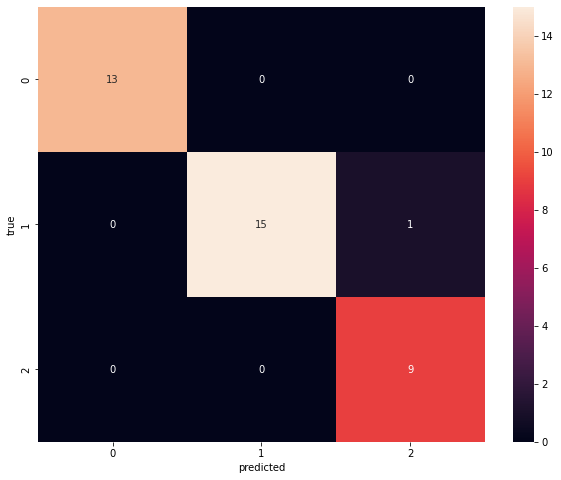

In [47]:
plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("true")

In [48]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [50]:
df.drop(["customer_id"], axis="columns", inplace=True)

In [51]:
df.groupby("country").mean()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
country,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [52]:
country_dummies = pd.get_dummies(df["country"], prefix="country")
gender_dummies = pd.get_dummies(df["gender"], prefix="gender")

In [53]:
dummies = pd.concat([country_dummies, gender_dummies], axis="columns")

In [54]:
df = pd.concat([df, dummies], axis="columns")

In [55]:
df.drop(["country", "gender"], axis="columns", inplace=True)

In [56]:
x = df.drop(["churn"], axis="columns")
y = df.churn

In [57]:
x_scaled = scaler.fit_transform(x)

In [58]:
# here x is scaled in range 0 to 1
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.25, random_state=1)

In [59]:
lgr.fit(xtrain, ytrain)

LogisticRegression(max_iter=10000)

In [60]:
lgr.score(xtest, ytest)

0.812

In [61]:
lgr.predict_proba(scaler.fit_transform(x[5:6]))

array([[0.91858773, 0.08141227]])

In [62]:
lgr.predict_proba(x[5:6])

array([[0., 1.]])

In [63]:
y_predicted = lgr.predict(xtest)

In [64]:
cm = confusion_matrix(y_true=ytest, y_pred=y_predicted)

Text(69.0, 0.5, 'true')

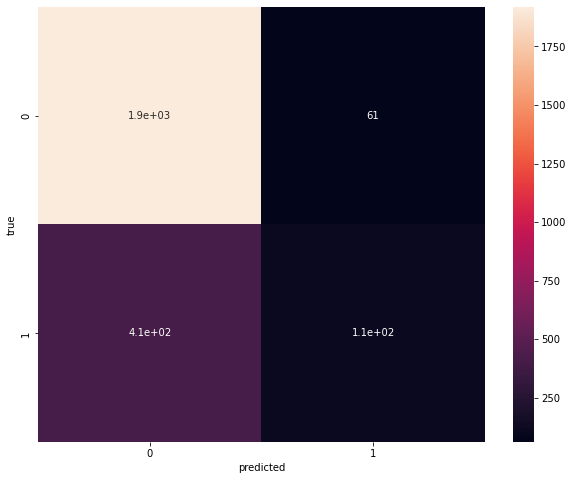

In [65]:
plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("true")

In [66]:
# here x is not scaled in range 0 to 1
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [67]:
lgr.fit(xtrain, ytrain)

LogisticRegression(max_iter=10000)

In [68]:
lgr.score(xtest, ytest)

0.7876

In [69]:
y_predicted = lgr.predict(xtest)

In [70]:
cm = confusion_matrix(y_true=ytest, y_pred=y_predicted)

Text(69.0, 0.5, 'true')

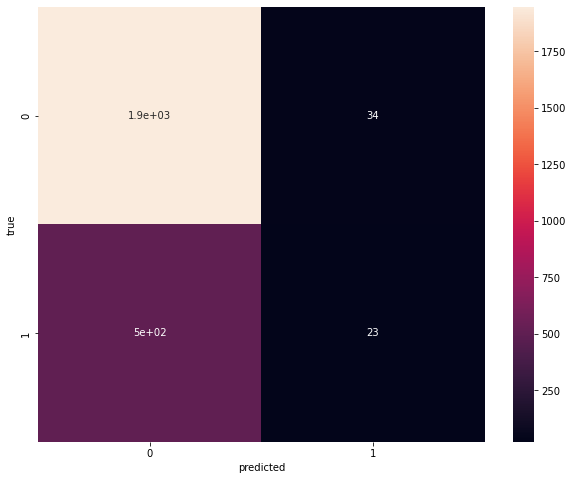

In [71]:
plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("true")